# Compare Theoretical Waveguide Loss to HFSS

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as sc
import skrf as rf

from waveguide import conductor_loss, dielectric_loss

plt.style.use(["science", "notebook"])

# Parameters

These parameters match the HFSS simulation

In [2]:
# Waveguide dimensions
a, b, d = 224.65*sc.mil, 112.35*sc.mil, 4.0045*sc.inch

In [3]:
# Waveguide walls (gold)
cond = 4.1e7  # conductivity, S/m

# Dielectric filling (HDPE)
er_mag = 2.3  # relative permittivity (magnitude)
tand = 1e-4   # loss tangent
er = er_mag * (1 - 1j * tand)

In [4]:
# Frequency sweep
f = np.linspace(26.8, 43.5, 17001) * 1e9

# Theory

In [5]:
# Empty waveguide
alphac1_theory = conductor_loss(f, cond, a, b, er=1, ur=1)
alpha1_theory = alphac1_theory.copy()

# Dielectric filled waveguide
alphac2_theory = conductor_loss(f, cond, a, b, er=er, ur=1)
alphad2_theory = dielectric_loss(f, a, b, er=er, ur=1, m=1, n=0)
alpha2_theory = alphac2_theory + alphad2_theory

# HFSS

In [6]:
hfss1 = rf.Network("hfss/WR22-4inch.s2p")       # empty waveguide
hfss2 = rf.Network("hfss/WR22-4inch-hdpe.s2p")  # HDPE-filled waveguide

# Compare

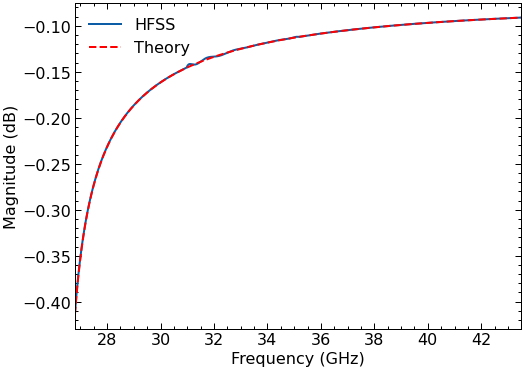

In [7]:
fig, ax = plt.subplots()
hfss1.plot_s_db(1, 0, ax=ax, label="HFSS")
ax.plot(f, -alpha1_theory * d * 8.686, 'r--', label="Theory")
ax.legend();

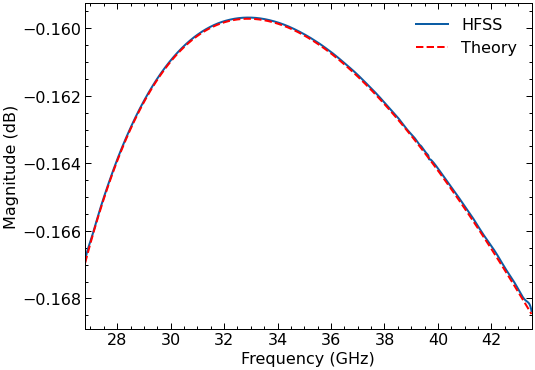

In [8]:
fig, ax = plt.subplots()
hfss2.plot_s_db(1, 0, ax=ax, label="HFSS")
ax.plot(f, -alpha2_theory * d * 8.686, 'r--', label="Theory")
ax.legend();